In [33]:
%load_ext autoreload
%autoreload 2
import logging
import sys
import time
from dataclasses import dataclass
from enum import Enum

from autoscript_sdb_microscope_client.structures import AdornedImage
import matplotlib.pyplot as plt
import numpy as np
from liftout import utils
from liftout.fibsem import acquire, milling, movement
from liftout.fibsem import utils as fibsem_utils
from liftout.fibsem.acquire import BeamType, ImageSettings, GammaSettings
from liftout.gui.qtdesigner_files import milling_dialog as milling_gui
from liftout.gui.utils import _WidgetPlot, create_crosshair
from matplotlib.patches import Rectangle
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtWidgets import QMessageBox
import scipy.ndimage as ndi
settings = utils.load_config(r"C:\Users\Admin\Github\autoliftout\liftout\protocol_liftout.yml")
microscope = fibsem_utils.initialise_fibsem(ip_address=settings["system"]["ip_address"])
image_settings = ImageSettings(
    resolution = settings["imaging"]["resolution"],
    dwell_time = settings["imaging"]["dwell_time"],
    hfw = settings["imaging"]["horizontal_field_width"],
    autocontrast = True,
    beam_type = BeamType.ION,
    gamma = GammaSettings(
        enabled = settings["gamma"]["correction"],
        min_gamma = settings["gamma"]["min_gamma"],
        max_gamma = settings["gamma"]["max_gamma"],
        scale_factor= settings["gamma"]["scale_factor"],
        threshold = settings["gamma"]["threshold"]
    ),
    save = False,
    label = "test",
    save_path=""
)

Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [26]:
img1 = acquire.new_image(microscope, image_settings)

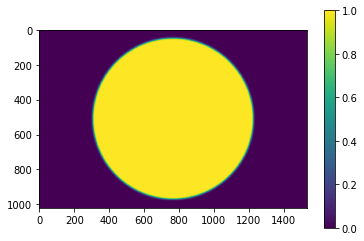

In [27]:
import skimage

from liftout.tools.auto import auto

mask = auto._mask_rectangular(img1.data.shape)
mask = auto._mask_circular(img1.data.shape)

plt.imshow(mask)
plt.colorbar()
plt.show()

(1024, 768)


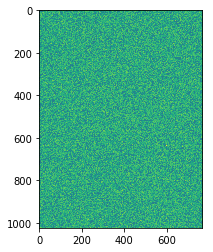

(1024, 1536)


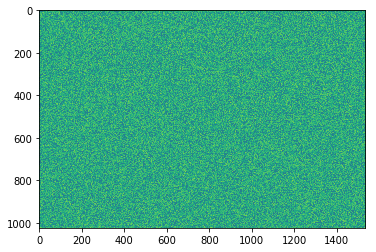

In [28]:


xlim, ylim = img1.data.shape[1] // 2, img1.data.shape[0]

reduced_area = img1.data[:ylim, :xlim]

print(reduced_area.shape)

plt.imshow(reduced_area)
plt.show()

print(img1.data.shape)
plt.imshow(img1.data)
plt.show()

9.765624999999999e-08


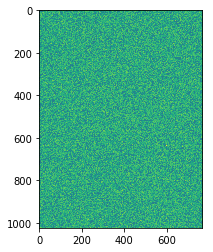

In [32]:
reference = AdornedImage(data=reduced_area)
reference.metadata = img1.metadata

print(reference.metadata.binary_result.pixel_size.x)
plt.imshow(reference.data)
plt.show()

(563, 461)


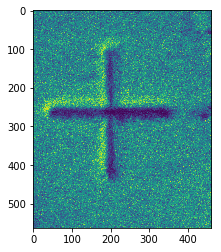

In [62]:
from autoscript_sdb_microscope_client.structures import Rectangle as AutoScriptRectangle

img_reduced = acquire.new_image(microscope, image_settings, reduced_area=AutoScriptRectangle(0.05, 0.25, 0.3, 0.55))
print(img_reduced.data.shape)

plt.imshow(img_reduced.data)
plt.show()

# img = acquire.new_image(microscope, image_settings)
# print(img.data.shape)

# plt.imshow(img.data)
# plt.show()



In [ ]:
from autoscript_sdb_microscope_client.structures import Rectangle as AutoScriptRectangle

def reduced_area_alignment(microscope, image_settings):
    
    img_reduced = acquire.new_image(microscope, image_settings, reduced_area=AutoScriptRectangle(0, 0, 0.5, 1))
    print(img_reduced.data.shape)

    



plt.imshow(img_reduced.data)
plt.show()






